In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format='svg'

# Загрузка и EDA

In [2]:
train_data = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [3]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
# Поменяем тип данных 'Id', 'DistrictId'на object

for i in [train_data, test_df]:
    i['Id'] = i['Id'].astype(str)
    i['DistrictId'] = i['DistrictId'].astype(str)
    
object_features = train_data.select_dtypes(include='object').columns.tolist()
print(object_features)

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']


In [6]:
for i in object_features:
    print(train_data[i].value_counts())

13045    1
11408    1
6847     1
2620     1
4090     1
        ..
12162    1
6207     1
1247     1
6017     1
14467    1
Name: Id, Length: 10000, dtype: int64
27     851
1      652
23     565
6      511
9      294
      ... 
117      1
196      1
207      1
205      1
209      1
Name: DistrictId, Length: 205, dtype: int64
B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


In [7]:
# Найдем повторяющиеся строки и удалим лишние.

train_data = train_data.drop_duplicates()

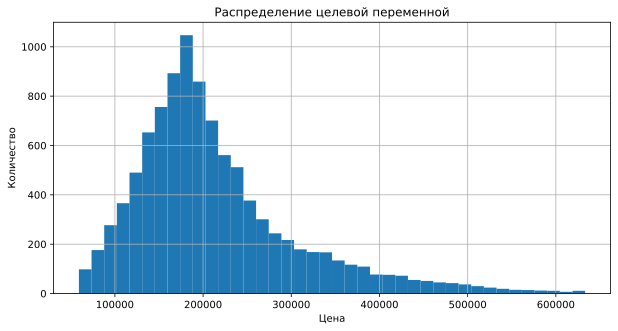

In [8]:
# Посмотрим распределение целевой переменной

plt.figure(figsize = (10, 5))

train_data['Price'].hist(bins=40)
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.title('Распределение целевой переменной')
plt.show()

### Обработка выбросов

#### Rooms

In [9]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [10]:
# Заменим значения, равные 0.0 на 1

train_data.loc[train_data['Rooms'] == 0] = 1
test_df.loc[test_df['Rooms'] == 0] = 1
train_data['Rooms'].value_counts()

2.0     3880
1.0     3713
3.0     2235
4.0      150
5.0       18
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [11]:
""" Создаем функцию outliers_number, расчитывающую количество выбросов, которая принимает выборку, а возвращает число выбросов,
    а также функцию outliers_to_median, заменяющюю выбросы на медианы. Функция outliers_to_median принимает датасет и 
    название признака, по которому определяются выбросы. Концы усов boxplot рассчитываем как разность первого квартиля и 
    полутора межквартильных расстояний и сумму третьего квартиля и полутора межквартильных расстояний соответственно.
    
    Также создали функции remove_outlier, удаляющую выбросы, функцию outliers_clip, которая действует как np.clip, 
    и функцию outliers_to_mean, заменяющую выбросы на средние значения.
    
    Применение функций показало, что лучше оставить выбросы без изменений.
"""


def outliers_number(df_in, param_name):
    q1 = df_in[param_name].quantile(0.25)
    q3 = df_in[param_name].quantile(0.75)
    iqr = q3 - q1
    boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    outliers = df_in[param_name].loc[(df_in[param_name] < boxplot_range[0]) | (df_in[param_name] > boxplot_range[1])]
    n = len(outliers)
    return n   


def remove_outlier(df_in, param_name):
    q1 = df_in[param_name].quantile(0.25)
    q3 = df_in[param_name].quantile(0.75)
    iqr = q3 - q1
    boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    changed_data = df_in.loc[(df_in[param_name] >= boxplot_range[0]) & (df_in[param_name] <= boxplot_range[1])]
    return changed_data


def outliers_to_median(df_in, param_name):
    q1 = df_in[param_name].quantile(0.25)
    q3 = df_in[param_name].quantile(0.75)
    iqr = q3 - q1
    boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    new_condition = (df_in[param_name] < boxplot_range[0]) | (df_in[param_name] > boxplot_range[1])
    feature_median = df_in[param_name].median()
    df_in.loc[new_condition, param_name] = feature_median
    return df_in
  
    
def outliers_to_mean(df_in, param_name):
    q1 = df_in[param_name].quantile(0.25)
    q3 = df_in[param_name].quantile(0.75)
    iqr = q3 - q1
    boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    new_condition = (df_in[param_name] < boxplot_range[0]) | (df_in[param_name] > boxplot_range[1])
    feature_mean = df_in[param_name].mean()
    df_in.loc[new_condition, param_name] = feature_mean
    return df_in


def outliers_clip(df_in, param_name):
    q1 = df_in[param_name].quantile(0.25)
    q3 = df_in[param_name].quantile(0.75)
    iqr = q3 - q1
    boxplot_range = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    condition_1 = (df_in[param_name] < boxplot_range[0]) 
    condition_2 = (df_in[param_name] > boxplot_range[1])
    df_in.loc[condition_1, param_name] = boxplot_range[0]
    df_in.loc[condition_1, param_name] = boxplot_range[1]
    return df_in



#### Выбросы по всем количественным признакам


In [12]:
features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
for el in features:
    print(f"Количество выбросов для признака {el}: {outliers_number(train_data, el)}")


Количество выбросов для признака Rooms: 172
Количество выбросов для признака Square: 247
Количество выбросов для признака LifeSquare: 238
Количество выбросов для признака KitchenSquare: 47
Количество выбросов для признака Floor: 66
Количество выбросов для признака HouseFloor: 49
Количество выбросов для признака HouseYear: 46
Количество выбросов для признака Ecology_1: 69
Количество выбросов для признака Social_1: 0
Количество выбросов для признака Social_2: 176
Количество выбросов для признака Social_3: 862
Количество выбросов для признака Healthcare_1: 212
Количество выбросов для признака Helthcare_2: 99
Количество выбросов для признака Shops_1: 553
Количество выбросов для признака Price: 591


### Обработка пропусков, поиск аномалий в данных

#### LifeSquare


In [13]:
train_data["LifeSquare"].isna().sum()

2110

In [14]:
train_data["LifeSquare"].value_counts()

1.000000     8
20.151696    1
29.473102    1
51.826876    1
47.972602    1
            ..
26.151559    1
17.984641    1
45.455722    1
50.458505    1
27.598712    1
Name: LifeSquare, Length: 7883, dtype: int64

In [15]:
""" Создадим вспомогательный признак LifeSquare_nan и заполним его 0, если пропуска в LifeSquare нет, и единицей, если пропуск 
    есть.
"""
for i in [train_data, test_df]:
    i["LifeSquare_nan"] = 0
    i.loc[train_data["LifeSquare"].isna(), "LifeSquare_nan"] = 1

train_data.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,...,B,47,8004,3,125.0,3,5,B,112411.221700,0
9991,11173,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,...,B,5,1564,0,540.0,0,0,B,182625.548872,1
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,...,B,28,7287,5,320.0,1,3,B,196641.468817,0
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,...,B,1,264,0,NaN,0,1,B,264213.558631,0
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,...,B,25,5648,1,30.0,2,4,B,136744.340827,0
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,B,52,10311,6,NaN,1,9,B,119367.455796,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,B,2,629,1,NaN,0,0,A,199715.148807,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,B,20,4386,14,NaN,1,5,B,165953.912580,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,B,47,8004,3,125.0,3,5,B,171842.411855,0
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,...,B,43,8429,3,NaN,3,9,B,177685.627486,0


In [16]:
"""В датасете есть квартиры, в которых жилая площадь составляет подозрительно малую долю от общей площади. 
   Найдем такие квартиры и заменим значение жилой площади на соответствующее средней доле жилой площади от общей площади.
"""
train_data.loc[(train_data['LifeSquare'] / train_data['Square']) < 0.2, :]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
26,8553,88,3.0,83.262530,4.769174,1.0,13,1.0,1977,0.127376,...,B,43,8429,3,NaN,3,9,B,410883.892020,0
119,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,174741.998061,0
212,1182,27,1.0,38.936986,3.064320,0.0,18,19.0,2017,0.211401,...,B,9,1892,0,NaN,0,1,B,93560.789553,0
227,3746,62,1.0,46.722042,1.944446,1.0,11,12.0,2018,0.072158,...,B,2,629,1,NaN,0,0,A,133721.121715,0
258,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,...,B,53,13670,4,NaN,1,11,B,286564.441972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,2309,6,2.0,61.547028,4.660610,1.0,9,17.0,2016,0.243205,...,B,5,1564,0,540.0,0,0,B,173732.138747,0
9462,10079,59,1.0,48.232741,3.288779,1.0,15,17.0,2017,0.019509,...,B,37,7687,11,176.0,5,5,B,207086.637307,0
9912,13523,23,1.0,52.787090,5.600609,1.0,7,1.0,2015,0.014073,...,B,2,475,0,NaN,0,0,B,104160.492175,0
9938,2913,34,4.0,94.888593,2.637095,1.0,4,1.0,2018,0.069753,...,B,53,13670,4,NaN,1,11,B,346949.506507,0


In [17]:
for i in [train_data, test_df]:
    mean_proportion = i.loc[i["LifeSquare_nan"] == 0, "LifeSquare"].mean() / i.loc[i["LifeSquare_nan"] == 0, "Square"].mean()
    print(mean_proportion)
    condition = (i['LifeSquare'] / i['Square']) < 0.14        
    i.loc[condition, 'LifeSquare'] = i['Square'] * mean_proportion

0.6731972844682129
0.6423808295362922


In [18]:
# Заполним пропуски в LifeSquare разницей между общей площадью, кухней и средним показателем оставшейся площади квартиры.

for i in [train_data, test_df]:
    i["LifeSquare_nan"] = 0
    i.loc[train_data["LifeSquare"].isna(), "LifeSquare_nan"] = 1
    mean_difference = i.loc[i["LifeSquare_nan"] == 0, "Square"].mean() - i.loc[i["LifeSquare_nan"] == 0, "LifeSquare"].mean() - i.loc[i["LifeSquare_nan"] == 0, "KitchenSquare"].mean()
    i["LifeSquare"].fillna(i["Square"] - i["KitchenSquare"] - mean_difference, inplace=True)
train_data.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,...,B,47,8004,3,125.0,3,5,B,112411.221700,0
9991,11173,6,2.0,62.648779,53.108133,0.0,6,17.0,1977,0.243205,...,B,5,1564,0,540.0,0,0,B,182625.548872,1
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,...,B,28,7287,5,320.0,1,3,B,196641.468817,0
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,...,B,1,264,0,NaN,0,1,B,264213.558631,0
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,...,B,25,5648,1,30.0,2,4,B,136744.340827,0
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,B,52,10311,6,NaN,1,9,B,119367.455796,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,B,2,629,1,NaN,0,0,A,199715.148807,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,B,20,4386,14,NaN,1,5,B,165953.912580,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,B,47,8004,3,125.0,3,5,B,171842.411855,0
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,...,B,43,8429,3,NaN,3,9,B,177685.627486,0


#### Square


In [19]:
""" Если есть объекты, у которых общая площадь (ОП) меньше, чем сумма жилой площади (ЖП) и площади кухни (ПК), 
    заменим у них значение общей площади на эту сумму (ЖП + ПК) плюс среднее значение разницы между ОП и (ЖП + ПК).
"""

for el in [train_data, test_df]:
    mean_difference = el["Square"].mean() - el["LifeSquare"].mean() -  el["KitchenSquare"].mean()
    condition = ((el["Square"] - el["LifeSquare"] - el["KitchenSquare"]) < 0)        
    el.loc[condition, "Square"] = el["LifeSquare"] + el["KitchenSquare"] + mean_difference
    
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5208.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.891300,58.830674,40.437433,6.273200,8.522100,12.606500,3.988574e+03,0.119536,24.676000,5349.614000,8.039600,1141.258449,1.31990,4.230900,213978.509490,0.211000
std,0.838185,82.555672,77.308846,28.560811,5.243287,6.777747,2.005003e+05,0.121583,17.539162,4008.541855,23.831736,1021.873598,1.49318,4.805902,93050.710367,0.408039
min,1.000000,4.633498,-6.681404,0.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,1.000000,42.361904,26.177050,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.00000,1.000000,153808.581831,0.000000
50%,2.000000,54.044279,34.701631,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,192141.616148,0.000000
75%,2.000000,67.188926,48.061455,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.00000,6.000000,249100.769116,0.000000
max,19.000000,7491.132775,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,633233.466570,1.000000


#### Floor, HouseFloor

In [20]:
""" Создадим вспомогательный признак Floor_excess и заполним его 0, если количество этажей в доме больше, либо равно этажу, на 
    котором расположена квартира, и единицей, если меньше.
    
    Для объектов, у которых количество этажей в доме меньше, чем этаж, на котором расположена квартира, меняем значение 
    HouseFloor на значение Floor.
"""

for i in [train_data, test_df]:
    i["Floor_excess"] = 0
    i.loc[i["Floor"] > i["HouseFloor"], "Floor_excess"] = 1 
    i.loc[i["Floor"] > i["HouseFloor"], "HouseFloor"] = i["Floor"]
train_data.describe()


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan,Floor_excess
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5208.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.891300,58.830674,40.437433,6.273200,8.522100,13.429300,3.988574e+03,0.119536,24.676000,5349.614000,8.039600,1141.258449,1.31990,4.230900,213978.509490,0.211000,0.182000
std,0.838185,82.555672,77.308846,28.560811,5.243287,6.100404,2.005003e+05,0.121583,17.539162,4008.541855,23.831736,1021.873598,1.49318,4.805902,93050.710367,0.408039,0.385864
min,1.000000,4.633498,-6.681404,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,42.361904,26.177050,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.00000,1.000000,153808.581831,0.000000,0.000000
50%,2.000000,54.044279,34.701631,6.000000,7.000000,14.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,192141.616148,0.000000,0.000000
75%,2.000000,67.188926,48.061455,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.00000,6.000000,249100.769116,0.000000,0.000000
max,19.000000,7491.132775,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,633233.466570,1.000000,1.000000


#### HouseYear

In [21]:
train_data['HouseYear'].value_counts()

1977        2648
2017         308
2016         304
2015         298
2014         210
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 98, dtype: int64

In [22]:
""" Если дата постройки дома больше 2021, то меняем ее на медиану.
"""

for el in [train_data, test_df]:
    condition = (el["HouseYear"] > 2021)
    median = el["HouseYear"].median()
    el.loc[condition, "HouseYear"] = median
    
train_data["HouseYear"].value_counts()

1977    2650
2017     308
2016     304
2015     298
2014     210
        ... 
1910       1
1928       1
1947       1
1914       1
1916       1
Name: HouseYear, Length: 96, dtype: int64

#### Healthcare_1

In [23]:
""" Создадим вспомогательный признак Healthcare_1_nan и заполним его 0, если пропуска в Healthcare_1 нет, и единицей, если 
    пропуск есть.
    Заполним пропуски медианой.
"""
for el in [train_data, test_df]:
    el["Healthcare_1_nan"] = 0
    el.loc[el["Healthcare_1"].isna(), "Healthcare_1_nan"] = 1
    median = el.loc[el["Healthcare_1_nan"] == 0, "Healthcare_1"].median()
    el["Healthcare_1"].fillna(median, inplace=True)
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan,Floor_excess,Healthcare_1_nan
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.891300,58.830674,40.437433,6.273200,8.522100,13.429300,1983.271700,0.119536,24.676000,5349.614000,8.039600,1025.647400,1.31990,4.230900,213978.509490,0.211000,0.182000,0.479200
std,0.838185,82.555672,77.308846,28.560811,5.243287,6.100404,59.033997,0.121583,17.539162,4008.541855,23.831736,747.201682,1.49318,4.805902,93050.710367,0.408039,0.385864,0.499592
min,1.000000,4.633498,-6.681404,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,42.361904,26.177050,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.00000,1.000000,153808.581831,0.000000,0.000000,0.000000
50%,2.000000,54.044279,34.701631,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,192141.616148,0.000000,0.000000,0.000000
75%,2.000000,67.188926,48.061455,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.00000,6.000000,249100.769116,0.000000,0.000000,1.000000
max,19.000000,7491.132775,7480.592129,2014.000000,42.000000,117.000000,2020.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,633233.466570,1.000000,1.000000,1.000000


### Генерация фичей

In [24]:
""" Мы уже создали 3 новых признака LifeSquare_nan, Floor_excess, Healthcare_1_nan.
    Теперь переведем строковые значения признаков 'Ecology_2', 'Ecology_3', 'Shops_2' в числовые (0 и 1).
"""
for i in [train_data, test_df]:
    i['Ecology_2'] = i['Ecology_2'].replace({'A': 0, 'B': 1})
    i['Ecology_3'] = i['Ecology_3'].replace({'A': 0, 'B': 1})
    i['Shops_2'] = i['Shops_2'].replace({'A': 0, 'B': 1})
for i in object_features:
    print(train_data[i].value_counts())

1        8
11408    1
6847     1
2620     1
4090     1
        ..
6207     1
1247     1
6017     1
10941    1
14467    1
Name: Id, Length: 9993, dtype: int64
27     846
1      652
23     565
6      510
9      294
      ... 
117      1
209      1
174      1
207      1
205      1
Name: DistrictId, Length: 206, dtype: int64
1    9903
0      97
Name: Ecology_2, dtype: int64
1    9725
0     275
Name: Ecology_3, dtype: int64
1    9175
0     825
Name: Shops_2, dtype: int64


In [25]:
# Разобьем дома на категории по дате постройки.


def house_year_to_cat(X):

    X['HouseYear_cat'] = 0

    X.loc[X['HouseYear'] > 2016, 'HouseYear_cat'] = 1  
    X.loc[(X['HouseYear'] > 2011) & (X['HouseYear'] <= 2016), 'HouseYear_cat'] = 2
    X.loc[(X['HouseYear'] > 1996) & (X['HouseYear'] <= 2011), 'HouseYear_cat'] = 3
    X.loc[(X['HouseYear'] > 1971) & (X['HouseYear'] <= 1996), 'HouseYear_cat'] = 4
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1971), 'HouseYear_cat'] = 5
    X.loc[X['HouseYear'] <= 1941, 'HouseYear_cat'] = 6

    return X



In [26]:
train_data = house_year_to_cat(train_data)
test_df = house_year_to_cat(test_df)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Floor_excess,Healthcare_1_nan,HouseYear_cat
0,11809,27,3.0,115.027311,95.486665,10.0,4,10.0,2014,0.075424,...,0,900.0,0,0,1,305018.871089,1,0,1,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,1183.0,1,0,1,177734.553407,0,0,0,5
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,240.0,3,1,1,282078.720850,0,0,0,4
3,2352,1,1.0,40.409907,29.869261,1.0,10,22.0,1977,0.007122,...,0,900.0,0,1,1,168106.007630,1,0,1,4
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,2,900.0,0,6,1,343995.102962,0,0,1,4


In [27]:
# Разобьем дома на категории по этажности.


def house_floor_to_cat(X):

    X['HouseFloor_cat'] = 0

    X.loc[X['HouseFloor'] == 1, 'HouseFloor_cat'] = 1  
    X.loc[(X['HouseFloor'] == 2) | (X['HouseFloor'] == 3), 'HouseFloor_cat'] = 2
    X.loc[(X['HouseFloor'] >= 4) & (X['HouseFloor'] <= 9), 'HouseFloor_cat'] = 3
    X.loc[(X['HouseFloor'] > 9) & (X['HouseFloor'] <= 20), 'HouseFloor_cat'] = 4
    X.loc[X['HouseFloor'] > 20, 'HouseFloor_cat'] = 5

    return X



In [28]:
train_data = house_floor_to_cat(train_data)
test_df = house_floor_to_cat(test_df)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Floor_excess,Healthcare_1_nan,HouseYear_cat,HouseFloor_cat
0,11809,27,3.0,115.027311,95.486665,10.0,4,10.0,2014,0.075424,...,900.0,0,0,1,305018.871089,1,0,1,2,4
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,1,177734.553407,0,0,0,5,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,240.0,3,1,1,282078.720850,0,0,0,4,4
3,2352,1,1.0,40.409907,29.869261,1.0,10,22.0,1977,0.007122,...,900.0,0,1,1,168106.007630,1,0,1,4,5
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,900.0,0,6,1,343995.102962,0,0,1,4,4


In [29]:
# Расчитаем долю LifeSquare в общей площади

train_data['LifeSquare_proportion'] = train_data['LifeSquare'] / train_data['Square']
test_df['LifeSquare_proportion'] = test_df['LifeSquare'] / test_df['Square']
test_df.head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Floor_excess,Healthcare_1_nan,HouseYear_cat,HouseFloor_cat,LifeSquare_proportion
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,1036.0,1,1,1,0,0,0,5,3,0.518193
1,5925,62,1.0,64.112344,42.568133,10.0,7,17.0,2017,0.072158,...,900.0,0,0,0,0,0,1,1,4,0.663962
2,960,27,2.0,59.463678,37.143160,9.0,19,19.0,1977,0.211401,...,900.0,0,1,1,0,0,1,4,4,0.624636
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,900.0,0,0,1,0,0,1,5,2,0.682710
4,746,74,1.0,53.837056,39.516537,1.0,8,17.0,1977,0.309479,...,990.0,0,6,1,0,0,0,4,4,0.734003
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,...,520.0,0,7,1,0,0,0,3,5,0.610287
6,672,62,1.0,46.269456,22.820239,11.0,8,17.0,2014,0.072158,...,900.0,0,0,0,0,0,1,2,4,0.493203
7,2471,2,2.0,48.172969,29.924204,6.0,4,9.0,1974,0.000000,...,900.0,2,5,1,0,0,1,4,3,0.621182
8,4510,1,1.0,43.153761,21.017596,9.0,10,17.0,2014,0.007122,...,900.0,0,1,1,0,0,1,2,4,0.487040
9,8354,62,2.0,81.331056,59.786844,10.0,1,16.0,1981,0.002212,...,900.0,1,5,0,0,0,1,4,4,0.735105


### Разбиение на train и test

In [30]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'LifeSquare_nan',
 'Floor_excess',
 'Healthcare_1_nan',
 'HouseYear_cat',
 'HouseFloor_cat',
 'LifeSquare_proportion']

In [31]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 
                 'Shops_1', 'Shops_2', 'LifeSquare_nan', 'Floor_excess', 'Healthcare_1_nan', 'HouseYear_cat', 'HouseFloor_cat', 
                 'LifeSquare_proportion']
target_name = 'Price'  
X = train_data.drop(target_name, axis=1)
y = train_data[target_name]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
test_df = test_df[feature_names]

### Построение модели

In [32]:
""" С помощью GridSearchCV для RandomForestRegressor нашли оптимальные значения параметров n_estimators, max_depth, 
    max_features.
    
    parameters = [{'n_estimators': [250, 300, 350, 400], 'max_features': ['auto', np.arange(5, 10)], 'max_depth': [None, np.arange(10, 20)]}]
    clf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=parameters, cv=5)
    clf.fit(X_train, y_train)
    clf.best_params_
"""

clf = RandomForestRegressor(n_estimators=350, random_state=42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
R2_valid = r2_score(y_valid, y_valid_pred)
R2_train = r2_score(y_train, y_train_pred)
print(f"R2 для тренировочной выборки: {R2_train}.\nR2 для тестовой выборки: {R2_valid}")

R2 для тренировочной выборки: 0.9623912271540727.
R2 для тестовой выборки: 0.7251304522435333


In [33]:
# кросс-валидация

cv_score = cross_val_score(clf, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
print(f"cv_score: {cv_score}, cv_score.mean():{cv_score.mean()}")

cv_score: [0.71942257 0.71218765 0.69474913], cv_score.mean():0.7087864526289862


In [34]:
# Оценим важность признаков

feature_importances = pd.DataFrame(zip(X_train.columns, clf.feature_importances_), columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)


,feature_name,importance
1,Rooms,0.226659
2,Square,0.215738
11,Social_1,0.086276
12,Social_2,0.080847
13,Social_3,0.057148
0,DistrictId,0.048105
8,Ecology_1,0.042220
3,LifeSquare,0.038323
7,HouseYear,0.031265
23,LifeSquare_proportion,0.031163


### Прогнозирование на тестовом датасете

In [35]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [36]:
test_df.shape

(5000, 24)

In [37]:
predictions = clf.predict(test_df)
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,159903.355717
1,5925,115743.205308
2,960,150562.656608
3,3848,126917.974971
4,746,190990.739628


In [38]:
submit.to_csv('submit3.csv', index=False)

### Light auto ML

In [39]:
# !pip install lightautoml

In [40]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.tasks.common_metric import mean_quantile_error

In [41]:
TASK = Task('reg', loss='mse', metric=mean_quantile_error, greater_is_better=False)
N_THREADS = 8 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TARGET_NAME = 'Price'
roles = {'target': TARGET_NAME, 'drop': ['Id']}


In [42]:
automl_model = TabularAutoML(task=TASK,
                            timeout=30000,
                            cpu_limit = N_THREADS,
                            gpu_ids='all',
                            reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                            general_params={'use_algos': [['lgb_tuned', 'cb_tuned', 'cb'],['lgb_tuned', 'cb']]},
                            tuning_params={'max_tuning_iter': 10},
                      )

In [43]:
oof_pred = automl_model.fit_predict(train_data, roles = roles)

In [44]:
submit['Price'] = automl_model.predict(test_df).data
submit.head()

,Id,Price
0,4567,160899.859375
1,5925,132811.484375
2,960,136190.218750
3,3848,122101.429688
4,746,178878.109375


In [45]:
submit.to_csv('submit4.csv', index=False)